In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, Flatten
from keras.optimizers import Adam

import sys
sys.path.append('../module/')

import gym2
from rl2.agents import eventDDPGAgent
from rl2.memory import SequentialMemory

Using TensorFlow backend.


In [2]:
# GymのPendulum環境を作成
dt = 0.005
env = gym2.make("Pendulum-v1", dt)
clip = 10.
env.max_torque, max_torque = clip, clip
env.action_space.high, env.action_space.low = max_torque, -max_torque

# 取りうる”打ち手”のアクション数と値の定義
nb_actios = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [3]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(3, activation="tanh")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

In [4]:
def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

In [5]:
# agent compile
l = 0.5
step = 40000
episode_step = int(200 * 0.05 / dt)
time_mode = False
a = agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])

## 40000 steps, 2000 episode steps, l = 0.5

In [9]:
#a.load_weights('../learned_models_safe/40000_e2000_l05.h5')
a.test(env, nb_episodes=5, lam=l, visualize=0, nb_max_episode_steps=episode_step, action_view=0, time_mode=time_mode)

Testing for 5 episodes ...
Episode 1: reward: -16885.540, steps: 2000
Episode 2: reward: -15435.789, steps: 2000
Episode 3: reward: -16168.667, steps: 2000
Episode 4: reward: -17689.577, steps: 2000
Episode 5: reward: -15871.967, steps: 2000


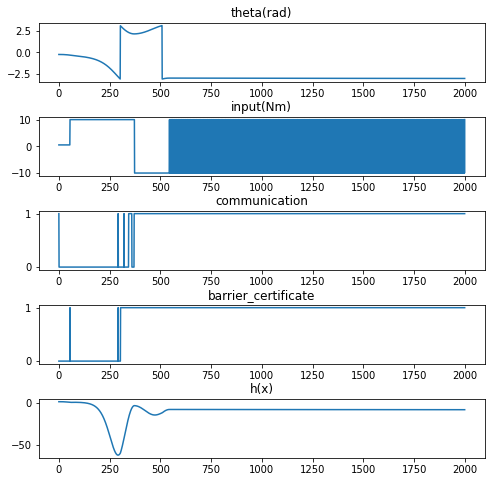

In [10]:
titles = ['theta(rad)', 'input(Nm)', 'communication', 'barrier_certificate', 'h(x)'] 
history = a.data_log[0]
x_axis = range(episode_step)
plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(history.shape[1]):
    data = history[:,i]
    plt.subplot(history.shape[1],1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

## 600000 steps, 2000 episode steps, l = 0.5

In [7]:
a.load_weights('../learned_models_safe/600000_e2000_l05.h5')
a.test(env, nb_episodes=5, lam=l, visualize=0, nb_max_episode_steps=episode_step, action_view=0, time_mode=time_mode)

Testing for 5 episodes ...
Episode 1: reward: -68.628, steps: 2000
Episode 2: reward: -8492.711, steps: 2000
Episode 3: reward: -76.795, steps: 2000
Episode 4: reward: -74.636, steps: 2000
Episode 5: reward: -15030.467, steps: 2000


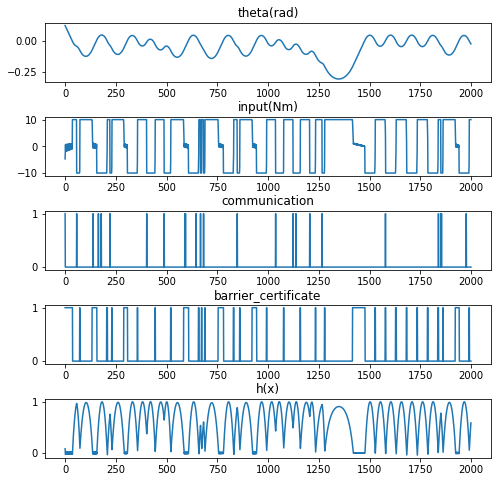

In [33]:
titles = ['theta(rad)', 'input(Nm)', 'communication', 'barrier_certificate', 'h(x)'] 
history = a.data_log[0]
x_axis = range(episode_step)
plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(history.shape[1]):
    data = history[:,i]
    plt.subplot(history.shape[1],1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

In [6]:
a.load_weights('../learned_models_safe/3000000_e2000_l05_pure.h5')
a.test(env, nb_episodes=1, lam=l, visualize=0, nb_max_episode_steps=episode_step, action_view=1, time_mode=time_mode)

Testing for 1 episodes ...
step =  1 , output of actor network =  [-10.  -1.  -1.]
step =  2 , output of actor network =  [-10.  -1.  -1.]
step =  3 , output of actor network =  [-10.  -1.  -1.]
step =  4 , output of actor network =  [-10.  -1.  -1.]
step =  5 , output of actor network =  [-10.  -1.  -1.]
step =  6 , output of actor network =  [-10.  -1.  -1.]
step =  7 , output of actor network =  [-10.  -1.  -1.]
step =  8 , output of actor network =  [-10.  -1.  -1.]
step =  9 , output of actor network =  [-10.  -1.  -1.]
step =  10 , output of actor network =  [-10.  -1.  -1.]
step =  11 , output of actor network =  [-10.  -1.  -1.]
step =  12 , output of actor network =  [-10.  -1.  -1.]
step =  13 , output of actor network =  [-10.  -1.  -1.]
step =  14 , output of actor network =  [-10.  -1.  -1.]
step =  15 , output of actor network =  [-10.  -1.  -1.]
step =  16 , output of actor network =  [-10.  -1.  -1.]
step =  17 , output of actor network =  [-10.  -1.  -1.]
step =  18 , 

step =  191 , output of actor network =  [ 0.51689637 -1.         -1.        ]
step =  192 , output of actor network =  [ 0.5403518 -1.        -1.       ]
step =  193 , output of actor network =  [ 0.5530822 -1.        -1.       ]
step =  194 , output of actor network =  [ 0.5764134 -1.        -1.       ]
step =  195 , output of actor network =  [ 0.5892123 -1.        -1.       ]
step =  196 , output of actor network =  [ 0.6124195 -1.        -1.       ]
step =  197 , output of actor network =  [ 0.62528324 -1.         -1.        ]
step =  198 , output of actor network =  [ 0.6483667 -1.        -1.       ]
step =  199 , output of actor network =  [ 0.6612916 -1.        -1.       ]
step =  200 , output of actor network =  [ 0.6842515 -1.        -1.       ]
step =  201 , output of actor network =  [ 0.697234 -1.       -1.      ]
step =  202 , output of actor network =  [ 0.72007054 -1.         -1.        ]
step =  203 , output of actor network =  [ 0.733107 -1.       -1.      ]
step =  2

step =  357 , output of actor network =  [79.30501 -1.      -1.     ]
step =  358 , output of actor network =  [81.09193 -1.      -1.     ]
step =  359 , output of actor network =  [82.90014 -1.      -1.     ]
step =  360 , output of actor network =  [84.7299 -1.     -1.    ]
step =  361 , output of actor network =  [86.58145 -1.      -1.     ]
step =  362 , output of actor network =  [88.455055 -1.       -1.      ]
step =  363 , output of actor network =  [90.350945 -1.       -1.      ]
step =  364 , output of actor network =  [92.26939 -1.      -1.     ]
step =  365 , output of actor network =  [94.210625 -1.       -1.      ]
step =  366 , output of actor network =  [96.17493 -1.      -1.     ]
step =  367 , output of actor network =  [98.16254 -1.      -1.     ]
step =  368 , output of actor network =  [100.17371  -1.       -1.     ]
step =  369 , output of actor network =  [102.2087  -1.      -1.    ]
step =  370 , output of actor network =  [104.26776  -1.       -1.     ]
step =  

step =  501 , output of actor network =  [10. -1. -1.]
step =  502 , output of actor network =  [362.84247  -1.       -1.     ]
step =  503 , output of actor network =  [10. -1. -1.]
step =  504 , output of actor network =  [355.5164  -1.      -1.    ]
step =  505 , output of actor network =  [10. -1. -1.]
step =  506 , output of actor network =  [347.86978  -1.       -1.     ]
step =  507 , output of actor network =  [10. -1. -1.]
step =  508 , output of actor network =  [339.92114  -1.       -1.     ]
step =  509 , output of actor network =  [10. -1. -1.]
step =  510 , output of actor network =  [331.69098  -1.       -1.     ]
step =  511 , output of actor network =  [10. -1. -1.]
step =  512 , output of actor network =  [323.20178  -1.       -1.     ]
step =  513 , output of actor network =  [10. -1. -1.]
step =  514 , output of actor network =  [314.47812  -1.       -1.     ]
step =  515 , output of actor network =  [10. -1. -1.]
step =  516 , output of actor network =  [305.54672 

step =  641 , output of actor network =  [-232.59367   -1.        -1.     ]
step =  642 , output of actor network =  [-10.  -1.  -1.]
step =  643 , output of actor network =  [-234.46968   -1.        -1.     ]
step =  644 , output of actor network =  [-10.  -1.  -1.]
step =  645 , output of actor network =  [-236.31415   -1.        -1.     ]
step =  646 , output of actor network =  [-10.  -1.  -1.]
step =  647 , output of actor network =  [-238.12686   -1.        -1.     ]
step =  648 , output of actor network =  [-10.  -1.  -1.]
step =  649 , output of actor network =  [-239.90874   -1.        -1.     ]
step =  650 , output of actor network =  [-10.  -1.  -1.]
step =  651 , output of actor network =  [-241.66193   -1.        -1.     ]
step =  652 , output of actor network =  [-10.  -1.  -1.]
step =  653 , output of actor network =  [-243.38982   -1.        -1.     ]
step =  654 , output of actor network =  [-10.  -1.  -1.]
step =  655 , output of actor network =  [-245.09718   -1.    

step =  794 , output of actor network =  [ 1.996001e+04 -1.000000e+00 -1.000000e+00]
step =  795 , output of actor network =  [-3.3765742e+04 -1.0000000e+00 -1.0000000e+00]
step =  796 , output of actor network =  [ 8.949954e+03 -1.000000e+00 -1.000000e+00]
step =  797 , output of actor network =  [ 3.1226092e+04 -1.0000000e+00 -1.0000000e+00]
step =  798 , output of actor network =  [-2.095138e+04 -1.000000e+00 -1.000000e+00]
step =  799 , output of actor network =  [ 1.068521e+04 -1.000000e+00 -1.000000e+00]
step =  800 , output of actor network =  [ 7.223068e+04 -1.000000e+00 -1.000000e+00]
step =  801 , output of actor network =  [-1.516772e+04 -1.000000e+00 -1.000000e+00]
step =  802 , output of actor network =  [ 1.32664e+04 -1.00000e+00 -1.00000e+00]
step =  803 , output of actor network =  [-2.2825272e+05 -1.0000000e+00 -1.0000000e+00]
step =  804 , output of actor network =  [ 7.3085864e+03 -1.0000000e+00 -1.0000000e+00]
step =  805 , output of actor network =  [ 1.7522537e+04

step =  925 , output of actor network =  [ 7.822777e+03 -1.000000e+00 -1.000000e+00]
step =  926 , output of actor network =  [ 2.1252395e+04 -1.0000000e+00 -1.0000000e+00]
step =  927 , output of actor network =  [-2.9599533e+04 -1.0000000e+00 -1.0000000e+00]
step =  928 , output of actor network =  [ 9.469701e+03 -1.000000e+00 -1.000000e+00]
step =  929 , output of actor network =  [ 4.0371473e+04 -1.0000000e+00 -1.0000000e+00]
step =  930 , output of actor network =  [-1.7825021e+04 -1.0000000e+00 -1.0000000e+00]
step =  931 , output of actor network =  [ 1.200995e+04 -1.000000e+00 -1.000000e+00]
step =  932 , output of actor network =  [ 4.1572384e+05 -1.0000000e+00 -1.0000000e+00]
step =  933 , output of actor network =  [-1.2742818e+04 -1.0000000e+00 -1.0000000e+00]
step =  934 , output of actor network =  [ 1.6421316e+04 -1.0000000e+00 -1.0000000e+00]
step =  935 , output of actor network =  [-5.007929e+04 -1.000000e+00 -1.000000e+00]
step =  936 , output of actor network =  [ 8

step =  1073 , output of actor network =  [-2.0797844e+04 -1.0000000e+00 -1.0000000e+00]
step =  1074 , output of actor network =  [ 1.119431e+04 -1.000000e+00 -1.000000e+00]
step =  1075 , output of actor network =  [ 1.3572314e+05 -1.0000000e+00 -1.0000000e+00]
step =  1076 , output of actor network =  [-1.340089e+04 -1.000000e+00 -1.000000e+00]
step =  1077 , output of actor network =  [ 1.5925046e+04 -1.0000000e+00 -1.0000000e+00]
step =  1078 , output of actor network =  [-5.213565e+04 -1.000000e+00 -1.000000e+00]
step =  1079 , output of actor network =  [ 8.462425e+03 -1.000000e+00 -1.000000e+00]
step =  1080 , output of actor network =  [ 2.7625453e+04 -1.0000000e+00 -1.0000000e+00]
step =  1081 , output of actor network =  [-2.1822697e+04 -1.0000000e+00 -1.0000000e+00]
step =  1082 , output of actor network =  [ 1.0929169e+04 -1.0000000e+00 -1.0000000e+00]
step =  1083 , output of actor network =  [ 1.0542816e+05 -1.0000000e+00 -1.0000000e+00]
step =  1084 , output of actor ne

step =  1217 , output of actor network =  [ 8.250933e+03 -1.000000e+00 -1.000000e+00]
step =  1218 , output of actor network =  [ 2.6159145e+04 -1.0000000e+00 -1.0000000e+00]
step =  1219 , output of actor network =  [-2.2322758e+04 -1.0000000e+00 -1.0000000e+00]
step =  1220 , output of actor network =  [ 1.1018416e+04 -1.0000000e+00 -1.0000000e+00]
step =  1221 , output of actor network =  [ 1.2919058e+05 -1.0000000e+00 -1.0000000e+00]
step =  1222 , output of actor network =  [-1.3279595e+04 -1.0000000e+00 -1.0000000e+00]
step =  1223 , output of actor network =  [ 1.6596008e+04 -1.0000000e+00 -1.0000000e+00]
step =  1224 , output of actor network =  [-4.3909797e+04 -1.0000000e+00 -1.0000000e+00]
step =  1225 , output of actor network =  [ 8.870905e+03 -1.000000e+00 -1.000000e+00]
step =  1226 , output of actor network =  [ 3.366745e+04 -1.000000e+00 -1.000000e+00]
step =  1227 , output of actor network =  [-1.8737086e+04 -1.0000000e+00 -1.0000000e+00]
step =  1228 , output of actor

step =  1334 , output of actor network =  [-2.4257055e+04 -1.0000000e+00 -1.0000000e+00]
step =  1335 , output of actor network =  [ 1.0778938e+04 -1.0000000e+00 -1.0000000e+00]
step =  1336 , output of actor network =  [ 1.1266127e+05 -1.0000000e+00 -1.0000000e+00]
step =  1337 , output of actor network =  [-1.3324479e+04 -1.0000000e+00 -1.0000000e+00]
step =  1338 , output of actor network =  [ 1.6962488e+04 -1.0000000e+00 -1.0000000e+00]
step =  1339 , output of actor network =  [-4.006691e+04 -1.000000e+00 -1.000000e+00]
step =  1340 , output of actor network =  [ 9.174823e+03 -1.000000e+00 -1.000000e+00]
step =  1341 , output of actor network =  [ 3.986403e+04 -1.000000e+00 -1.000000e+00]
step =  1342 , output of actor network =  [-1.6987596e+04 -1.0000000e+00 -1.0000000e+00]
step =  1343 , output of actor network =  [ 1.3320015e+04 -1.0000000e+00 -1.0000000e+00]
step =  1344 , output of actor network =  [-1.1278834e+05 -1.0000000e+00 -1.0000000e+00]
step =  1345 , output of actor

step =  1447 , output of actor network =  [ 1.2877196e+05 -1.0000000e+00 -1.0000000e+00]
step =  1448 , output of actor network =  [-1.2987167e+04 -1.0000000e+00 -1.0000000e+00]
step =  1449 , output of actor network =  [ 1.8009594e+04 -1.0000000e+00 -1.0000000e+00]
step =  1450 , output of actor network =  [-3.4217777e+04 -1.0000000e+00 -1.0000000e+00]
step =  1451 , output of actor network =  [ 9.684453e+03 -1.000000e+00 -1.000000e+00]
step =  1452 , output of actor network =  [ 5.4021617e+04 -1.0000000e+00 -1.0000000e+00]
step =  1453 , output of actor network =  [-1.5088933e+04 -1.0000000e+00 -1.0000000e+00]
step =  1454 , output of actor network =  [ 1.5104237e+04 -1.0000000e+00 -1.0000000e+00]
step =  1455 , output of actor network =  [-5.386047e+04 -1.000000e+00 -1.000000e+00]
step =  1456 , output of actor network =  [ 8.783299e+03 -1.000000e+00 -1.000000e+00]
step =  1457 , output of actor network =  [ 3.4387582e+04 -1.0000000e+00 -1.0000000e+00]
step =  1458 , output of actor

step =  1551 , output of actor network =  [ 1.7684611e+04 -1.0000000e+00 -1.0000000e+00]
step =  1552 , output of actor network =  [-3.461259e+04 -1.000000e+00 -1.000000e+00]
step =  1553 , output of actor network =  [ 9.767629e+03 -1.000000e+00 -1.000000e+00]
step =  1554 , output of actor network =  [ 5.9017723e+04 -1.0000000e+00 -1.0000000e+00]
step =  1555 , output of actor network =  [-1.4592691e+04 -1.0000000e+00 -1.0000000e+00]
step =  1556 , output of actor network =  [ 1.5938017e+04 -1.0000000e+00 -1.0000000e+00]
step =  1557 , output of actor network =  [-4.402086e+04 -1.000000e+00 -1.000000e+00]
step =  1558 , output of actor network =  [ 9.216478e+03 -1.000000e+00 -1.000000e+00]
step =  1559 , output of actor network =  [ 4.3397312e+04 -1.0000000e+00 -1.0000000e+00]
step =  1560 , output of actor network =  [-1.601083e+04 -1.000000e+00 -1.000000e+00]
step =  1561 , output of actor network =  [ 1.4544355e+04 -1.0000000e+00 -1.0000000e+00]
step =  1562 , output of actor netwo

step =  1689 , output of actor network =  [ 9.826743e+03 -1.000000e+00 -1.000000e+00]
step =  1690 , output of actor network =  [ 6.4443902e+04 -1.0000000e+00 -1.0000000e+00]
step =  1691 , output of actor network =  [-1.4131478e+04 -1.0000000e+00 -1.0000000e+00]
step =  1692 , output of actor network =  [ 1.6926703e+04 -1.0000000e+00 -1.0000000e+00]
step =  1693 , output of actor network =  [-3.6776848e+04 -1.0000000e+00 -1.0000000e+00]
step =  1694 , output of actor network =  [ 9.745859e+03 -1.000000e+00 -1.000000e+00]
step =  1695 , output of actor network =  [ 6.12002e+04 -1.00000e+00 -1.00000e+00]
step =  1696 , output of actor network =  [-1.4292972e+04 -1.0000000e+00 -1.0000000e+00]
step =  1697 , output of actor network =  [ 1.6712156e+04 -1.0000000e+00 -1.0000000e+00]
step =  1698 , output of actor network =  [-3.7799066e+04 -1.0000000e+00 -1.0000000e+00]
step =  1699 , output of actor network =  [ 9.68048e+03 -1.00000e+00 -1.00000e+00]
step =  1700 , output of actor network 

step =  1800 , output of actor network =  [-3.3071568e+06 -1.0000000e+00 -1.0000000e+00]
step =  1801 , output of actor network =  [ 7.7679175e+03 -1.0000000e+00 -1.0000000e+00]
step =  1802 , output of actor network =  [ 2.3771787e+04 -1.0000000e+00 -1.0000000e+00]
step =  1803 , output of actor network =  [-2.2390344e+04 -1.0000000e+00 -1.0000000e+00]
step =  1804 , output of actor network =  [ 1.1854269e+04 -1.0000000e+00 -1.0000000e+00]
step =  1805 , output of actor network =  [-4.2272078e+05 -1.0000000e+00 -1.0000000e+00]
step =  1806 , output of actor network =  [ 7.9008125e+03 -1.0000000e+00 -1.0000000e+00]
step =  1807 , output of actor network =  [ 2.5100068e+04 -1.0000000e+00 -1.0000000e+00]
step =  1808 , output of actor network =  [-2.130062e+04 -1.000000e+00 -1.000000e+00]
step =  1809 , output of actor network =  [ 1.2199175e+04 -1.0000000e+00 -1.0000000e+00]
step =  1810 , output of actor network =  [-2.0794888e+05 -1.0000000e+00 -1.0000000e+00]
step =  1811 , output of

step =  1905 , output of actor network =  [ 8.296741e+03 -1.000000e+00 -1.000000e+00]
step =  1906 , output of actor network =  [ 3.0177e+04 -1.0000e+00 -1.0000e+00]
step =  1907 , output of actor network =  [-1.8413973e+04 -1.0000000e+00 -1.0000000e+00]
step =  1908 , output of actor network =  [ 1.3612321e+04 -1.0000000e+00 -1.0000000e+00]
step =  1909 , output of actor network =  [-7.15604e+04 -1.00000e+00 -1.00000e+00]
step =  1910 , output of actor network =  [ 8.792641e+03 -1.000000e+00 -1.000000e+00]
step =  1911 , output of actor network =  [ 3.8035535e+04 -1.0000000e+00 -1.0000000e+00]
step =  1912 , output of actor network =  [-1.6341063e+04 -1.0000000e+00 -1.0000000e+00]
step =  1913 , output of actor network =  [ 1.5035931e+04 -1.0000000e+00 -1.0000000e+00]
step =  1914 , output of actor network =  [-4.7686574e+04 -1.0000000e+00 -1.0000000e+00]
step =  1915 , output of actor network =  [ 9.373781e+03 -1.000000e+00 -1.000000e+00]
step =  1916 , output of actor network =  [ 5

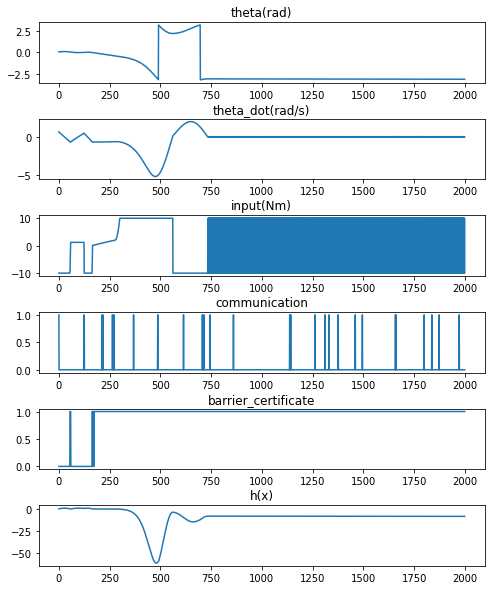

In [12]:
titles = ['theta(rad)', 'theta_dot(rad/s)', 'input(Nm)', 'communication', 'barrier_certificate', 'h(x)'] 
history = a.data_log[0]
x_axis = range(episode_step)
plt.figure(figsize=(8,10))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(history.shape[1]):
    data = history[:,i]
    plt.subplot(history.shape[1],1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

In [14]:
# logの詳細な数字をみる
import csv

log = []
with open('../learning_log.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        log.append(row)
log = np.array(log).astype('float')

(600000, 2)


In [26]:
data = log[2000 * 51:2000*52-1]
print(np.min(data[:,0]))

-0.039418053380664175


## マイナスになってる!

In [21]:
import rl2.barrier_certificate as bc
import inspect

print(inspect.getsource(bc.u_cbf))

def u_cbf(x, u_candidate, ratio):
    ran = _u_of_x(x, ratio)
    rmin, rmax = ran[0], ran[1]
    out = u_candidate
    if False:
        if x[0] < 0:
            out = rmax
        else:
            out = rmin
    else:
        if u_candidate < rmin:
            out = rmin
        elif u_candidate > rmax:
            out = rmax
    return np.array([out])

